**Customer Churn Prediction Project**
 
**Author:** Akshay Bhujbal  
**Project Type:** AI / Machine Learning Portfolio Project  

**Project Overview**

This project demonstrates a **Customer Churn Prediction system** using a **Random Forest Classifier**.  

The app allows users to: 

1. Enter customer details manually using the sidebar.  
2. Predict whether a customer is likely to **churn (Yes)** or **not churn (No)**.  
3. View the probability of churn for each customer.  

The model was trained on the **IBM Telco Customer Churn dataset** with 19 features including demographic, subscription, and service usage information.  
It predicts whether a customer will churn based on their profile, subscription type, and service usage patterns.


# Import Libraries

We’ll start by importing the required libraries.

Explanation:

- ```pandas, numpy``` → for data handling.
- ```matplotlib, seaborn``` → visualization.
- ```LabelEncoder, StandardScaler``` → handle categorical values and feature scaling.
- ```RandomForestClassifier``` → chosen algorithm (robust, works well with categorical + numerical mix).
- ```metrics``` → to evaluate performance.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load Dataset

We’ll load the IBM Telco Customer Churn dataset (from Kaggle).

- Load dataset from CSV.
- ```head()``` → quick view of data.
- ```shape``` → check number of rows and columns.

In [3]:
#  Load dataset
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Projects_Sorted\AI-Portfolio\Showcase-Projects\Customer-Churn-Prediction\data\Telco-Customer-Churn.csv")

# Show first 5 rows
print(df.head())
print(df.shape)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# Data Preprocessing

We’ll clean the data, encode categorical variables, and scale features.

- ```customerID``` → unique identifier, drop it.
- ```TotalCharges``` → has empty strings, convert to numeric and fill missing values.
- Encode categorical columns (Yes/No, Male/Female, etc.).
- Scale numerical values so features are on similar scale.

In [4]:
# Check for missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
# Drop customerID column (not useful for prediction)
df = df.drop("customerID", axis=1)

In [6]:
# Replace empty strings in TotalCharges with NaN, then convert to float
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"] = df["TotalCharges"].astype(float)
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [7]:
# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()
df[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(df[["tenure", "MonthlyCharges", "TotalCharges"]])

print(df.head())

   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445             0   
1       1              0        0           0  0.066327             1   
2       1              0        0           0 -1.236724             1   
3       1              0        0           0  0.514251             0   
4       0              0        0           0 -1.236724             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1     

# Split Data

Separate features ```(X)``` and target ```(y)``` → churn.

- Target variable = ```Churn```.
- Use ```train_test_split``` → 80% train, 20% test.
- ```stratify=y``` → ensures equal distribution of churn/no-churn in train/test.

In [8]:
#  Split into train & test
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)

(5634, 19) (1409, 19)


# Train Model

We’ll use Random Forest Classifier.

- ```RandomForestClassifier``` → chosen ML algorithm.
- ```n_estimators=200``` → number of trees.
- ```class_weight="balanced"``` → handles class imbalance (more no-churn customers).
- Train on training data, then predict on test data.

In [10]:
#  Train Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=200, class_weight="balanced")
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# Predictions
y_pred = model.predict(X_test)

# Evaluate Model

Check performance using classification metrics.

- ```accuracy_score``` → overall correct predictions.
- ```confusion_matrix``` → shows churn vs non-churn predictions.
- ```classification_report``` → precision, recall, F1-score (important for churn).

In [12]:
#  Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7856635911994322

Confusion Matrix:
 [[928 107]
 [195 179]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



## **Accuracy: 0.7857**
- This means the model correctly predicts **about 78.6% of all cases** (churn + no churn).  
- Accuracy alone can be misleading because the dataset is **imbalanced**:  
  - 0 → No churn (majority class)  
  - 1 → Churn (minority class)  
- The model predicts **no-churn customers better** than churners.

## **Precision, Recall, F1-Score**
- **Class 0 (No churn)**  
  - Precision = 0.83 → Out of all customers predicted as no-churn, 83% were actually no-churn  
  - Recall = 0.90 → Out of all actual no-churn customers, 90% were correctly predicted  
  - F1-score = 0.86 → Good balance for no-churn prediction  

- **Class 1 (Churn)**  
  - Precision = 0.63 → Out of all customers predicted as churn, 63% were actually churn  
  - Recall = 0.48 → Out of all actual churn customers, only 48% were correctly detected  
  - F1-score = 0.54 → Model struggles to detect churners reliably  

**Observation:** Catching churners is harder, but more important for business decisions.

## **Next Steps to Improve**
1. **Handle Class Imbalance:**  
   - Use `class_weight='balanced'` in RandomForest (already applied)  
   - Or use **SMOTE** to oversample churn cases  
2. **Feature Engineering:**  
   - Create features like `AverageMonthlyCharges = TotalCharges / tenure` or `ServiceCount = sum of additional services`  
3. **Tune Hyperparameters:**  
   - Adjust `n_estimators`, `max_depth`, `min_samples_split` to improve churn detection (recall for class 1)  
4. **Try Other Models:**  
   - Gradient Boosting, XGBoost, LightGBM → often detect churners better in imbalanced datasets  


# Feature Importance

Find out which features are most important.

- Helps explain which features drive churn (e.g., tenure, contract type, monthly charges).

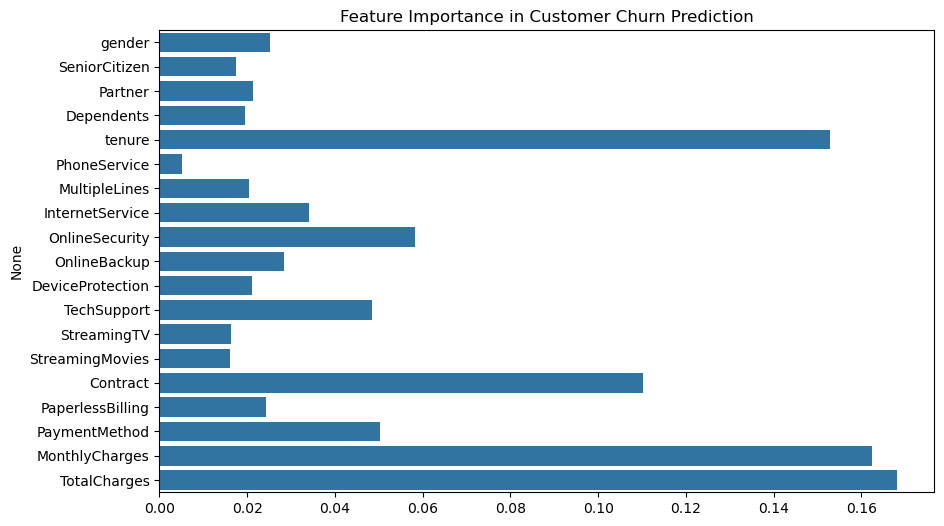

In [13]:
# Feature Importance
importances = model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance in Customer Churn Prediction")
plt.show()

# Save Model and Scaler
- Save trained model + scaler to use in Streamlit app without retraining

In [16]:
import pickle
# Save model
pickle.dump(model, open("churn_model.pkl", "wb"))

# Save scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))

# Create Streamlit App ```(app.py)```

- **Sidebar inputs** → users can enter feature values
- **Scaler** → scale inputs like during training
- **Predict** → model predicts churn probability and shows result

```python 

import streamlit as st
import pandas as pd
import numpy as np
import pickle

# --------------------------
# Load Model and Scaler
# --------------------------
model = pickle.load(open("churn_model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

# Column names used in training
feature_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'
]

# --------------------------
# Streamlit Page Config
# --------------------------
st.set_page_config(page_title="Customer Churn Prediction", layout="wide")
st.title("Customer Churn Prediction App")
st.write("Predict if a customer is likely to churn based on their details.")

# --------------------------
# Sidebar Input
# --------------------------
st.sidebar.header("Enter Customer Details")

input_data = {}
# Default numeric values for example
default_values = {
    'gender': 0, 'SeniorCitizen': 0, 'Partner': 0, 'Dependents': 0, 'tenure': 0,
    'PhoneService': 1, 'MultipleLines': 0, 'InternetService': 0, 'OnlineSecurity': 0,
    'OnlineBackup': 0, 'DeviceProtection': 0, 'TechSupport': 0, 'StreamingTV': 0,
    'StreamingMovies': 0, 'Contract': 0, 'PaperlessBilling': 1, 'PaymentMethod': 0,
    'MonthlyCharges': 0.0, 'TotalCharges': 0.0
}

# Create inputs
for col in feature_columns:
    if col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        input_data[col] = st.sidebar.number_input(col, value=float(default_values[col]))
    else:
        input_data[col] = st.sidebar.number_input(col, value=int(default_values[col]))

# Convert to DataFrame
features = pd.DataFrame([input_data])

# --------------------------
# Scale numeric features
# --------------------------
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
features[numeric_cols] = scaler.transform(features[numeric_cols])

# --------------------------
# Prediction
# --------------------------
if st.button("Predict Churn"):
    pred = model.predict(features)
    pred_proba = model.predict_proba(features)[0][1]
    
    if pred[0] == 1:
        st.error(f"Customer is likely to CHURN! Probability: {pred_proba:.2f}")
    else:
        st.success(f"Customer is NOT likely to churn. Probability of churn: {pred_proba:.2f}")

# --------------------------
# Notes
# --------------------------
st.markdown("---")
st.markdown("""
**About this App:**
- Enter customer details in the sidebar.
- Categorical features are encoded numerically as done during training.
- Numeric features are scaled using the saved StandardScaler.
- Random Forest model predicts churn probability.
""")

```

# App Overview

This Streamlit app predicts whether a customer will churn or not based on their details such as tenure, monthly charges, contract type, and services subscribed.


## App_Overview

![App Overview](screenshots/01_app_overview.png)  
*Main interface of the Customer Churn Prediction app showing input sidebar and prediction button.*



## Churn

![Churn Prediction](screenshots/02_Churn.png)  
*Example of a customer predicted to CHURN. The app displays probability of churn and highlights risk.*



## Not_Churn

![Not Churn Prediction](screenshots/03_Not_Churn.png)  
*Example of a customer predicted NOT to churn. The app shows low probability of churn.*



**Classification Report:**  
- **Precision (Churn=1):** 0.63 → Out of all predicted churns, 63% were correct.  
- **Recall (Churn=1):** 0.48 → Out of all actual churns, 48% were correctly detected.  
- **F1-score (Churn=1):** 0.54 → Balance between precision and recall.  

> Note: Accuracy is dominated by the majority class (non-churn). For churn prediction, **recall is critical** because missing a churned customer can be costly.


# Conclusion & Next Steps

1. **Handle Class Imbalance:**  
   - Use `class_weight='balanced'` in RandomForest (already applied)  
   - Or use oversampling techniques like SMOTE.  

2. **Feature Tuning:**  
   - Evaluate feature importance and consider engineering new features (e.g., customer tenure × monthly charges).  

3. **Try Other Models:**  
   - XGBoost, LightGBM, or CatBoost may improve recall for the minority class.  

4. **Deploy & Monitor:**  
   - Streamlit app allows interactive predictions.  
   - Collect real-world feedback and retrain periodically for better performance.
